In [6]:
import dicom
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import tensorflow as tf
import numpy as np
from tqdm import tqdm_notebook
import scipy.misc
from skimage import io
import scipy.stats
import seaborn as sns
import skimage.color
from skimage.filters import threshold_otsu
import keras

from matplotlib import animation
from IPython.display import HTML
from PIL import Image
import pandas as pd
import nibabel as nib
from nibabel.testing import data_path

In [7]:
#realigned_atlas = nib.load('../../Data/pig_2/coregistered_pig_2_atlas.nii').get_data()
anatomical = nib.load('/home/chris/projects/rfmri/Data/pig_2/coregistered_anatomy.nii').get_data()
mean_fmri = nib.load('/home/chris/projects/rfmri/Data/pig_2/meanus822-0016-00001-000001-01.nii').get_data()  
mask = np.load('/home/chris/projects/rfmri/Data/pig_2/brandon/mask_2017_09_18.npy')

/home/chris/projects/rfmri/pig/envi/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(16485, 300)

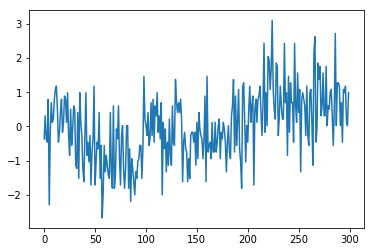

In [62]:
from sklearn import preprocessing

data = np.load("fmri_preprocessed_2017_09_18.npy")
data = np.transpose(data)
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data = np.transpose(data)
data.shape

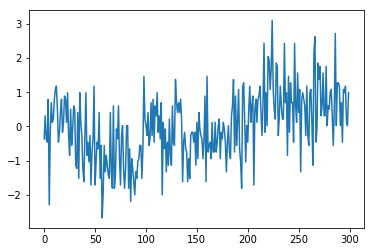

In [63]:
plt.plot(data[0])


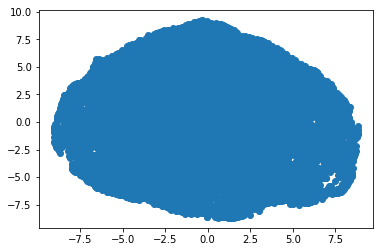

In [16]:
# squished_embeddings = np.load('../../Results/12B/embeddings-squished.npy')
# plt.plot(squished_embeddings[:, 4])



# squished_embeddings[:, 10:12].shape
# # squished_embeddings.shape

plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.savefig('../../Results/12B/tsne-50.png')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 16485 samples in 0.491s...
[t-SNE] Computed neighbors for 16485 samples in 180.898s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16485
[t-SNE] Computed conditional probabilities for sample 2000 / 16485
[t-SNE] Computed conditional probabilities for sample 3000 / 16485
[t-SNE] Computed conditional probabilities for sample 4000 / 16485
[t-SNE] Computed conditional probabilities for sample 5000 / 16485
[t-SNE] Computed conditional probabilities for sample 6000 / 16485
[t-SNE] Computed conditional probabilities for sample 7000 / 16485
[t-SNE] Computed conditional probabilities for sample 8000 / 16485
[t-SNE] Computed conditional probabilities for sample 9000 / 16485
[t-SNE] Computed conditional probabilities for sample 10000 / 16485
[t-SNE] Computed conditional probabilities for sample 11000 / 16485
[t-SNE] Computed conditional probabilities for sample 12000 / 16485
[t-SNE] Computed conditional probabilities for 

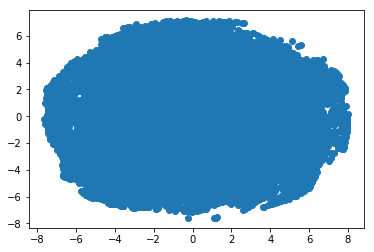

In [2]:
from sklearn import manifold
from time import time

squished_embeddings = np.load('../../Results/12D/embeddings-squished.npy')
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, n_iter=300, perplexity=50, verbose=1)
tsne_result = tsne.fit_transform(squished_embeddings)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
#plt.savefig('./12B/tsne-50.png')
# np.save('./12B/tsne-50.npy', tsne_result)

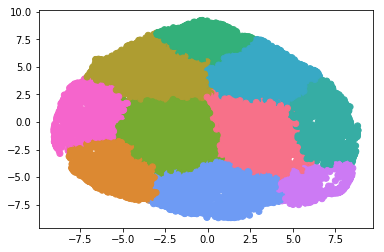

In [37]:
# color (kmeans) and label
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

qualitative_clusters = 10
my_kmeans = SpectralClustering(n_clusters=qualitative_clusters, eigen_solver='arpack',affinity="nearest_neighbors")

# my_kmeans = KMeans(n_clusters=qualitative_clusters, n_init=50)
rgbs = [np.array(c) for c in sns.color_palette("husl", qualitative_clusters)]
my_kmeans.fit(tsne_result)
labels = my_kmeans.labels_
colors = [rgbs[i] for i in labels]

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors)
plt.savefig('../../Results/12B/P50-SpectralClustering10/clusters.png')

# db = DBSCAN(eps=0.5,min_samples=30)
# db.fit_predict(tsne_result)
# labels = db.labels_
# rgbs = [np.array(c) for c in sns.color_palette("husl", len(np.unique(labels)))]
# colors = [rgbs[i] for i in labels]

# plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors)
# plt.savefig('./Base/tsne-100-kmeans-480.png')



In [39]:
print(np.unique(labels))

[0 1 2 3 4 5 6 7 8 9]


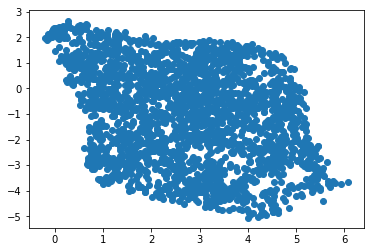

In [40]:
small_island = tsne_result[labels == 0]
plt.scatter(small_island[:,0], small_island[:,1])

In [25]:
labels = np.load('../../../Results/Pig 2/12A/SpectralClustering/Experiment12A-embedings_4_clusters.npy')
labels.shape
np.unique(labels)

rgbs = [np.array(c) for c in sns.color_palette("husl", 3)]
print(rgbs)

[array([ 0.96779756,  0.44127456,  0.53581032]), array([ 0.312689  ,  0.69287546,  0.19237048]), array([ 0.23299121,  0.63958655,  0.92607061])]


In [27]:
slice_i = 0
plt.figure(figsize=(20,10))
x,y,z = mask.nonzero()

# label_roi = 4
# x_points = x[labels==label_roi]
# y_points = y[labels==label_roi]
# z_points = z[labels==label_roi]

# for cluster_i in range(num):
# x_points = x[labels==np.unique(labels)[cluster_i]]
# y_points = y[labels==np.unique(labels)[cluster_i]]
# z_points = z[labels==np.unique(labels)[cluster_i]]

num = np.unique(labels).shape[0]
rgbs = [np.array(c) for c in sns.color_palette("husl", num)]

for slice_i in range(anatomical.shape[2]):
    plt.imshow(anatomical[:,:,slice_i], cmap='viridis')
    for i in range(x_points.shape[0]):
        if z_points[i] == slice_i:
            pass
            plt.scatter(x=y_points[i], y=x_points[i], c=rgbs[cluster_i], s=3)
    plt.savefig('../../../Results/Pig 2/12A/SpectralClustering/4_Clusters/Combined/_slice_' + str(slice_i) + '.png')
    plt.close('all')
